### В связи с тем, что у меня не получилось загрузить полностью всю базу данных на гугл диск, я с места хранения на ноуте извлекла из всех аудио значения и поместила их в all_data.pickle и all_label.pickle, и сохранила их на гугл диск для дальнейшей работы. Ход действий смотреть в файле laba_1_a_e_a_work_audio.ipynb


In [0]:
import librosa
import numpy as np
import pickle

from google.colab import drive
drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis"

#### Подгружаем сохраненные файлы для извлечения признаков

In [0]:
# путь к файлам
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

In [0]:
# считываем дынные из файла
with open(path + 'all_data.pickle', 'rb') as f:
  all_data = pickle.load(f)

In [0]:
# выводим количество примеров
print(len(all_data))

5683


In [0]:
# находим feature.melspectrogram (параметры по умолчанию n_fft = 2048 , hop_length = 512) для каждого примера
all_data_mel = []
for i in all_data:
  mel = librosa.feature.melspectrogram(y=i, sr=8000)
  all_data_mel.append(mel)
# print(all_data_mel)

In [0]:
# записываем полученные признаки в all_data_mel.pickle
with open(path + 'all_data_mel.pickle', 'wb') as f_d_m:
    pickle.dump(all_data_mel, f_d_m)

#### Подгружаем сохраненные метки и признаки

In [0]:
from google.colab import drive
import pickle

drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
total 7757214
-rw------- 1 root root  622477851 Mar  4 14:12  all_data_mel.pickle
-rw------- 1 root root 1238421886 Feb 27 14:57  all_data.pickle
-rw------- 1 root root      11384 Feb 27 14:12  all_label.pickle
-rw------- 1 root root  187421525 Mar  4 14:12  data_test.pickle
-rw------- 1 root root  435055710 Mar  4 14:12  data_train.pickle
-rw------- 1 root root       3420 Mar  4 14:12  label_test.pickle
-rw------- 1 root root      13768 Mar  4 10:00  label_t

In [0]:
# путь к файлам
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

In [0]:
# считываем метки из файла
with open(path + 'all_label.pickle', 'rb') as f:
  all_labels = pickle.load(f)

In [0]:
print(len(all_labels))

5683


In [0]:
# считываем признаки из файла
with open(path + 'all_data_mel.pickle', 'rb') as f:
  all_data_mel_new = pickle.load(f)

In [0]:
print(len(all_data_mel_new))

5683


In [0]:
### Находим максимальное количество столбцов в массиве
max_column = 0
for i in all_data_mel_new:
  if max_column <= i.shape[1]:
    max_column = i.shape[1]

In [0]:
print(max_column)

469


#### Разбиваем на test и train с соблюдением пропорций

In [0]:
# для этого необходимо создать словарь, где ключь - это метки, значения - это список массивов признаков для каждой метки
all_dict = {}
for i in range(len(all_data_mel_new)):
    if all_labels[i] in all_dict:
        all_dict.update({all_labels[i]: all_dict[all_labels[i]] + [all_data_mel_new[i]]})
    else:
        all_dict.update({all_labels[i]: [all_data_mel_new[i]]}) 

In [0]:
for k_new_dict, v_new_dict in all_dict.items():
    print(k_new_dict, len(v_new_dict))

0 80
1 171
2 81
3 85
4 173
5 188
6 66
7 176
8 174
9 162
10 183
11 184
12 153
13 181
14 117
15 57
16 191
17 180
18 161
19 163
20 179
21 147
22 83
23 194
24 99
25 162
26 186
27 180
28 195
29 113
30 94
31 90
32 187
33 135
34 180
35 167
36 88
37 80
38 64
39 56
40 78


In [0]:
# делим данные на test(30%), train(70%)
train_data = []
train_label = []
test_data = []
test_label = []

for k_new_dict, v_new_dict in all_dict.items():
  count = 0
  for i in v_new_dict:
    count += 1
    if count <= round(len(v_new_dict)*0.7):
      train_data.append(i) # добавляем в словарь массив признаков
      train_label.append(k_new_dict) # добавляем в словарь метку массива признаков
    else:
      test_data.append(i) # добавляем в словарь массив признаков
      test_label.append(k_new_dict)  # добавляем в словарь метку массива признаков

In [0]:
print(len(train_data), len(train_label))
print(len(test_data), len(test_label))

3978 3978
1705 1705


In [0]:
# выводим количество массивов признаков на метку (класс) для train
count_train=[0 for x in range(41)]
# print(a)

for i in range(0, len(train_label)):
      # if all_labels[i] in a.index(all_labels[i]):
      #   a[a.index(all_labels[i])] += 1
      count_train[train_label[i]] += 1
print(count_train)

[56, 120, 57, 59, 121, 132, 46, 123, 122, 113, 128, 129, 107, 127, 82, 40, 134, 126, 113, 114, 125, 103, 58, 136, 69, 113, 130, 126, 136, 79, 66, 63, 131, 94, 126, 117, 62, 56, 45, 39, 55]


In [0]:
# выводим количество массивов признаков на метку (класс) для test
count_test=[0 for x in range(41)]
# print(a)

for i in range(0, len(test_label)):
      # if all_labels[i] in a.index(all_labels[i]):
      #   a[a.index(all_labels[i])] += 1
      count_test[test_label[i]] += 1
print(count_test)

[24, 51, 24, 26, 52, 56, 20, 53, 52, 49, 55, 55, 46, 54, 35, 17, 57, 54, 48, 49, 54, 44, 25, 58, 30, 49, 56, 54, 59, 34, 28, 27, 56, 41, 54, 50, 26, 24, 19, 17, 23]


In [0]:
# сохраняем train_label
with open(path + 'label_train.pickle', 'wb') as f_label_train:
    pickle.dump(train_label, f_label_train)

In [0]:
# сохранаем test_label
with open(path + 'label_test.pickle', 'wb') as f_label_test:
    pickle.dump(test_label, f_label_test)

In [0]:
# сохранаем train_data
with open(path + 'data_train.pickle', 'wb') as f_data_train:
    pickle.dump(train_data, f_data_train)

In [0]:
# сохранаем test_data
with open(path + 'data_test.pickle', 'wb') as f_data_test:
    pickle.dump(test_data, f_data_test)

#### Считываем сохраненные файлы

In [0]:
from google.colab import drive
import numpy as np
import pickle

drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
total 7757322
-rw------- 1 root root  622477851 Mar  4 14:12  all_data_mel.pickle
-rw------- 1 root root 1238421886 Feb 27 14:57  all_data.pickle
-rw------- 1 root root      11384 Feb 27 14:12  all_label.pickle
-rw------- 1 root root  187421525 Mar  4 14:12  data_test.pickle
-rw------- 1 root root  435055710 Mar  4 14:12  data_train.pickle
-rw------- 1 root root       3420 Mar  4 14:12  label_test.pickle
-rw------- 1 root root       7970 Mar  4 14:12  label_t

In [0]:
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

with open(path + 'data_train.pickle', 'rb') as f:
  train_data = pickle.load(f)

with open(path + 'data_test.pickle', 'rb') as f:
  test_data = pickle.load(f)

#### Заполняем массивы нулями до одной длины

#### Вариант 1. Добавление нулей в массив.

In [0]:
norm_train_data = []
for ss in train_data:
  new_matrix = np.zeros((128, 469)) 
  # где 128 - количество строк в массиве, 
  # 469 - максимальное количество столбцов для всех данных (определенное ранее), 
  # заполняем массив нулями с указанной размерностью
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_train_data.append(new_matrix.ravel())

In [0]:
norm_test_data = []
for ss in test_data:
  new_matrix = np.zeros((128, 469))
  # где 128 - количество строк в массиве, 
  # 469 - максимальное количество столбцов для всех данных (определенное ранее), 
  # заполняем массив нулями с указанной размерностью
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_test_data.append(new_matrix.ravel())

In [0]:
with open(path + 'norm_test_data.pickle', 'wb') as f:
    pickle.dump(norm_test_data, f)
with open(path + 'norm_train_data.pickle', 'wb') as f:
  pickle.dump(norm_train_data, f)

#### Вариант 2. Дополнения до максимальной длины теми же признаками

In [0]:
norm_train_data_v3 = []
for ss in train_data:
  # print(ss)
  new_matrix_new = np.zeros((128, 469))
  for i in range(ss.shape[0]):
    # count = 0
    for j in range(ss.shape[1]):
      step = round(new_matrix_new.shape[1]/ss.shape[1])
      count = 0
      try:
        # count = 0
        while count <= step:
          j_array = j + round(count*ss.shape[1])
          new_matrix_new[i][j_array] += ss[i][j]
          count += 1
      except:
        continue
  norm_train_data_v3.append(new_matrix_new.ravel())
# print(norm_train_data_v3)

In [0]:
norm_test_data_v3 = []
for ss in test_data:
  # print(ss)
  new_matrix_new = np.zeros((128, 469))
  for i in range(ss.shape[0]):
    # count = 0
    for j in range(ss.shape[1]):
      step = round(new_matrix_new.shape[1]/ss.shape[1])
      count = 0
      try:
        # count = 0
        while count <= step:
          j_array = j + round(count*ss.shape[1])
          new_matrix_new[i][j_array] += ss[i][j]
          count += 1
      except:
        continue
  norm_test_data_v3.append(new_matrix_new.ravel())
# print(norm_train_data_v3)

#### Подгружаем сохраненные данные дополненные до максимальной длины и метки. Результаты по v2

In [0]:
from google.colab import drive
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score

import pickle
import numpy as np

drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 7757214
-rw------- 1 root root  622477851 Mar  4 14:12  all_data_mel.pickle
-rw------- 1 root root 1238421886 Feb 27 14:57  all_data.pickle
-rw------- 1 root root      11384 Feb 27 14:12  all_label.pickle
-rw------- 1 root root  187421525 Mar  4 14:12  data_test.pickle
-rw------- 1 root root  435055710 Mar  4 14:12  data_train.pickle
-rw------- 1 root root       3420 Mar  4 14:12  label_test.pickle
-rw------- 1 root root      13768 Mar  4 10:00  label_test_v1.npy
-rw------- 1 root root       7970 Mar  4 14:12  label_train.pickle
-rw------- 1 root root  818934758 Feb 28 15:39  norm_test_data.pickle
-rw------- 1 root root  818934758 Mar  5 07:26  norm_test_data_v3.pickle
-rw------- 1 root root 1910688484 Feb 28 15:39  norm_train_data.pickle
-rw------- 1 root root 1910688484 Mar  5 07:27  norm_train_data_v3.pickle
-rw------- 1 root root      13768 Mar  4

In [0]:
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

with open(path + 'norm_train_data_v3.pickle', 'rb') as f:
  train_data = pickle.load(f)

with open(path + 'norm_test_data_v3.pickle', 'rb') as f:
  test_data = pickle.load(f)

with open(path + 'label_train.pickle', 'rb') as f:
  label_train = pickle.load(f)

with open(path + 'label_test.pickle', 'rb') as f:
  label_test = pickle.load(f)

#### Находим лучшие параметри для SVC

In [0]:
# так как при всем количестве наблюдений и при 300  GridSearchCV(SVC()) не справляется, 
# зависает почти в самом конце, решила попробовать на 100 наблюдениях
# задаем изменяемые параметры param_grid
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['linear','rbf', 'poly']} 

grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=10)

grid.fit(test_data[:100], label_test[:100])

grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.700, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.600, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.600, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.650, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.700, total=   0.7s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.1s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.0s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.0s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.550, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.350, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.350, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.450, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.350, total=   0.8s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.700, total=   0.8s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  8.7min finished


{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

In [0]:
svm = SVC(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm.fit(train_data, label_train)
prediction_test = svm.predict(test_data)
prediction_train = svm.predict(train_data)
# f1 = f1_score(label_test, prediction, average= 'micro')

In [0]:
print(classification_report(label_test, prediction_test))

              precision    recall  f1-score   support

           0       0.73      0.46      0.56        24
           1       0.09      0.06      0.07        51
           2       0.12      0.25      0.16        24
           3       0.50      0.12      0.19        26
           4       0.36      0.19      0.25        52
           5       0.13      0.11      0.12        56
           6       0.00      0.00      0.00        20
           7       0.07      0.19      0.10        53
           8       0.08      0.04      0.05        52
           9       0.16      0.12      0.14        49
          10       0.26      0.45      0.33        55
          11       0.17      0.11      0.13        55
          12       0.12      0.20      0.15        46
          13       0.49      0.72      0.58        54
          14       1.00      0.43      0.60        35
          15       0.33      0.06      0.10        17
          16       0.29      0.35      0.32        57
          17       0.00    

In [0]:
print(classification_report(label_train, prediction_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       132
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00       123
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       113
          10       1.00      1.00      1.00       128
          11       1.00      1.00      1.00       129
          12       1.00      1.00      1.00       107
          13       1.00      1.00      1.00       127
          14       1.00      1.00      1.00        82
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00       134
          17       1.00    

In [0]:
# сохраняем предсказания для test и train v3 для дальнейшей работы

np.save(path + 'prediction_test_v3', prediction_test)
np.save(path + 'prediction_train_v3', prediction_train)

#### Подгружаем сохраненные данные дополненные до максимальной длины и метки. Результаты по v1

In [0]:
from google.colab import drive
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score

import pickle
import numpy as np

drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 7757277
-rw------- 1 root root  622477851 Mar  4 14:12  all_data_mel.pickle
-rw------- 1 root root 1238421886 Feb 27 14:57  all_data.pickle
-rw------- 1 root root      11384 Feb 27 14:12  all_label.pickle
-rw------- 1 root root  187421525 Mar  4 14:12  data_test.pickle
-rw------- 1 root root  435055710 Mar  4 14:12  data_train.pickle
-rw------- 1 root root       3420 Mar  4 14:12  label_test.pickle
-rw------- 1 root root       7970 Mar  4 14:12  label_train.pickle
-rw------- 1 root root  818934758 Mar 10 18:13  norm_test_data.pickle
-rw------- 1 root root  818934758 Mar  5 07:26  norm_test_data_v3.pickle
-rw------- 1 root root 1910688484 Mar 10 18:13  norm_train_data.pickle
-rw------- 1 root root 1910688484 Mar  5 07:27  norm_train_data_v3.pickle
-rw------- 1 root root      13768 Mar 10 20:50  prediction_test_v1.npy
-rw------- 1 root root      13768 M

In [0]:
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

with open(path + 'norm_train_data.pickle', 'rb') as f:
  train_data = pickle.load(f)

with open(path + 'norm_test_data.pickle', 'rb') as f:
  test_data = pickle.load(f)

with open(path + 'label_train.pickle', 'rb') as f:
  label_train = pickle.load(f)

with open(path + 'label_test.pickle', 'rb') as f:
  label_test = pickle.load(f)

In [0]:
# так как при всем количестве наблюдений и при 300  GridSearchCV(SVC()) не справляется, 
# зависает почти в самом конце, решила попробовать на 100 наблюдениях
# задаем изменяемые параметры param_grid
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['linear','rbf', 'poly']} 

grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=10)

grid.fit(test_data[:100], label_test[:100])

grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.650, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.550, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.600, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.550, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.1s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.0s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.9s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.550, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.500, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.350, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.350, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.450, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.600, total=   0.8s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.650, total=   0.9s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  8.2min finished


{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [0]:
svm = SVC(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm.fit(train_data, label_train)
prediction_test = svm.predict(test_data)
prediction_train = svm.predict(train_data)
# f1 = f1_score(label_test, prediction, average= 'micro')

In [0]:
print(classification_report(label_test, prediction_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6842    0.5417    0.6047        24
           1     0.1250    0.0392    0.0597        51
           2     0.1176    0.2500    0.1600        24
           3     0.0500    0.0385    0.0435        26
           4     0.6000    0.4615    0.5217        52
           5     0.2609    0.1071    0.1519        56
           6     0.1154    0.1500    0.1304        20
           7     0.1385    0.3396    0.1967        53
           8     0.0938    0.0577    0.0714        52
           9     0.1765    0.0612    0.0909        49
          10     0.2721    0.6727    0.3874        55
          11     0.2344    0.2727    0.2521        55
          12     0.1216    0.1957    0.1500        46
          13     0.6333    0.7037    0.6667        54
          14     0.9048    0.5429    0.6786        35
          15     0.7500    0.3529    0.4800        17
          16     0.3770    0.4035    0.3898        57
          17     0.3333    

In [0]:
print(classification_report(label_train, prediction_train, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.8571    0.9231        56
           1     1.0000    0.9583    0.9787       120
           2     1.0000    1.0000    1.0000        57
           3     1.0000    1.0000    1.0000        59
           4     1.0000    0.9917    0.9959       121
           5     1.0000    0.9545    0.9767       132
           6     1.0000    0.9348    0.9663        46
           7     1.0000    1.0000    1.0000       123
           8     1.0000    1.0000    1.0000       122
           9     1.0000    0.9469    0.9727       113
          10     1.0000    1.0000    1.0000       128
          11     1.0000    0.9922    0.9961       129
          12     1.0000    1.0000    1.0000       107
          13     1.0000    1.0000    1.0000       127
          14     1.0000    0.9634    0.9814        82
          15     1.0000    0.9250    0.9610        40
          16     1.0000    1.0000    1.0000       134
          17     1.0000    

In [0]:
# сохраняем предсказания для test и train v3 для дальнейшей работы

np.save(path + 'prediction_test_v1', prediction_test)
np.save(path + 'prediction_train_v1', prediction_train)

Как можно заметить по представленным результатам v1 (дополнение массивов признаков нулями до максимальной длины) позал наибольшую f_scora_weighted_avg = 23,5 %

#### Построение матрицы путаницы

In [0]:
import pandas as pd
import numpy as np
import pickle
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:
# подгружаем файл train.csv - для извлечения имен классов
data = pd.read_csv(path + 'train.csv')
labels = list(data['label'])

# создаем список для записи уникальных имен
labels_list = []
for i in labels:
    if i not in labels_list:
        labels_list.append(i)

In [0]:
# подгружаем сохраненные ранее верные label_train и label_test
with open(path + 'label_train.pickle', 'rb') as f:
  label_train = pickle.load(f)

with open(path + 'label_test.pickle', 'rb') as f:
  label_test = pickle.load(f)

In [0]:
# подгружаем сохраненные ранее предсказания для test и train
prediction_test = np.load(path + 'prediction_test_v1.npy')
prediction_train = np.load(path + 'prediction_train_v1.npy')

##### Построение матрицы путаницы для prediction_test

[[0.54166667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.03921569 0.         ... 0.03921569 0.         0.01960784]
 [0.         0.         0.25       ... 0.         0.         0.        ]
 ...
 [0.         0.         0.05263158 ... 0.10526316 0.         0.        ]
 [0.05882353 0.         0.         ... 0.         0.05882353 0.05882353]
 [0.         0.         0.04347826 ... 0.04347826 0.         0.08695652]]


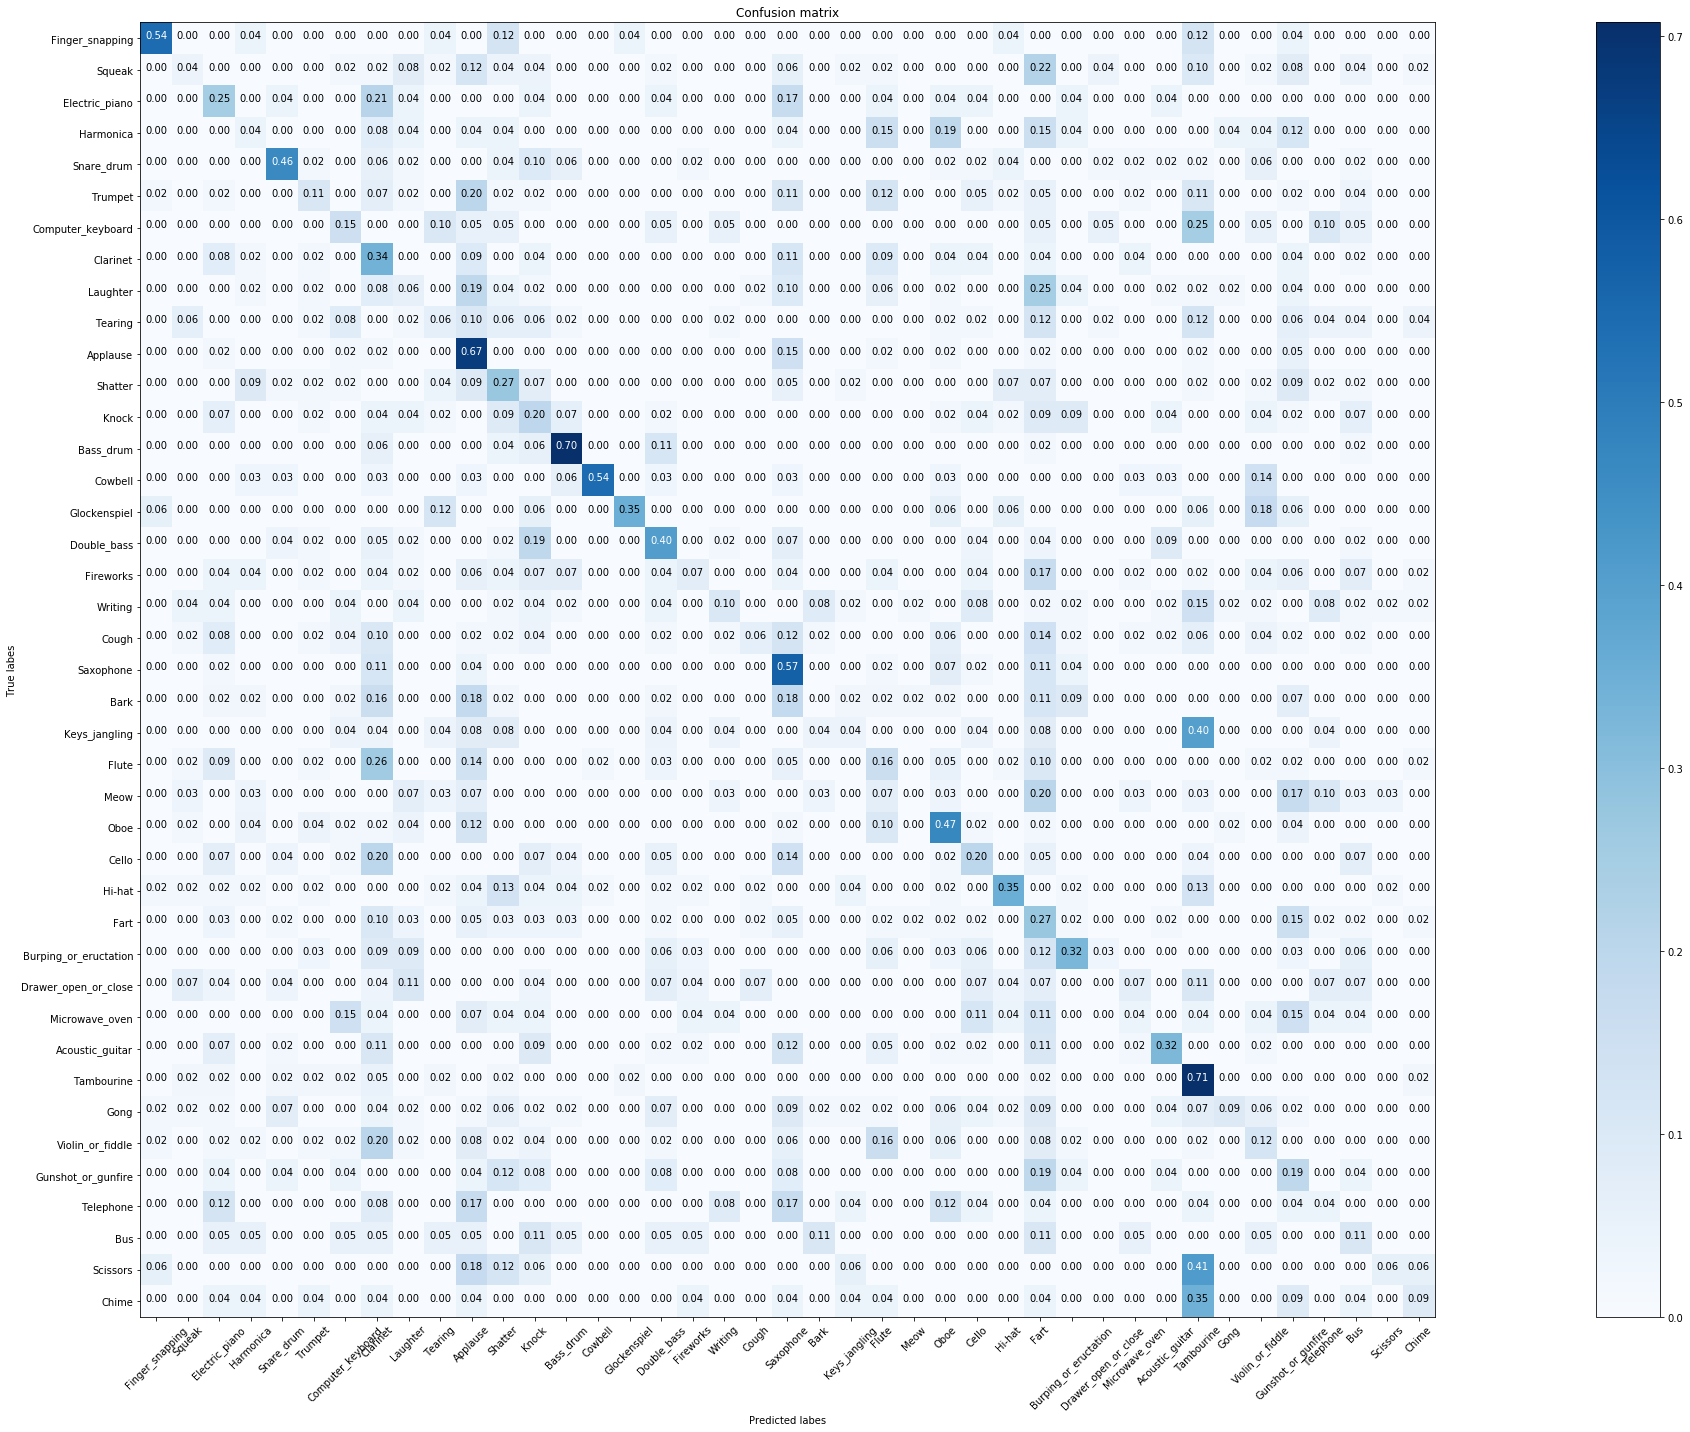

In [0]:
cm = confusion_matrix(label_test, prediction_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels_list))
plt.xticks(tick_marks, labels_list, rotation=45)
plt.yticks(tick_marks, labels_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()

##### Построение матрицы путаницы для prediction_train

[[0.85714286 0.         0.         ... 0.         0.         0.        ]
 [0.         0.95833333 0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.97777778 0.         0.        ]
 [0.         0.         0.         ... 0.         0.71794872 0.        ]
 [0.         0.         0.         ... 0.         0.         0.90909091]]


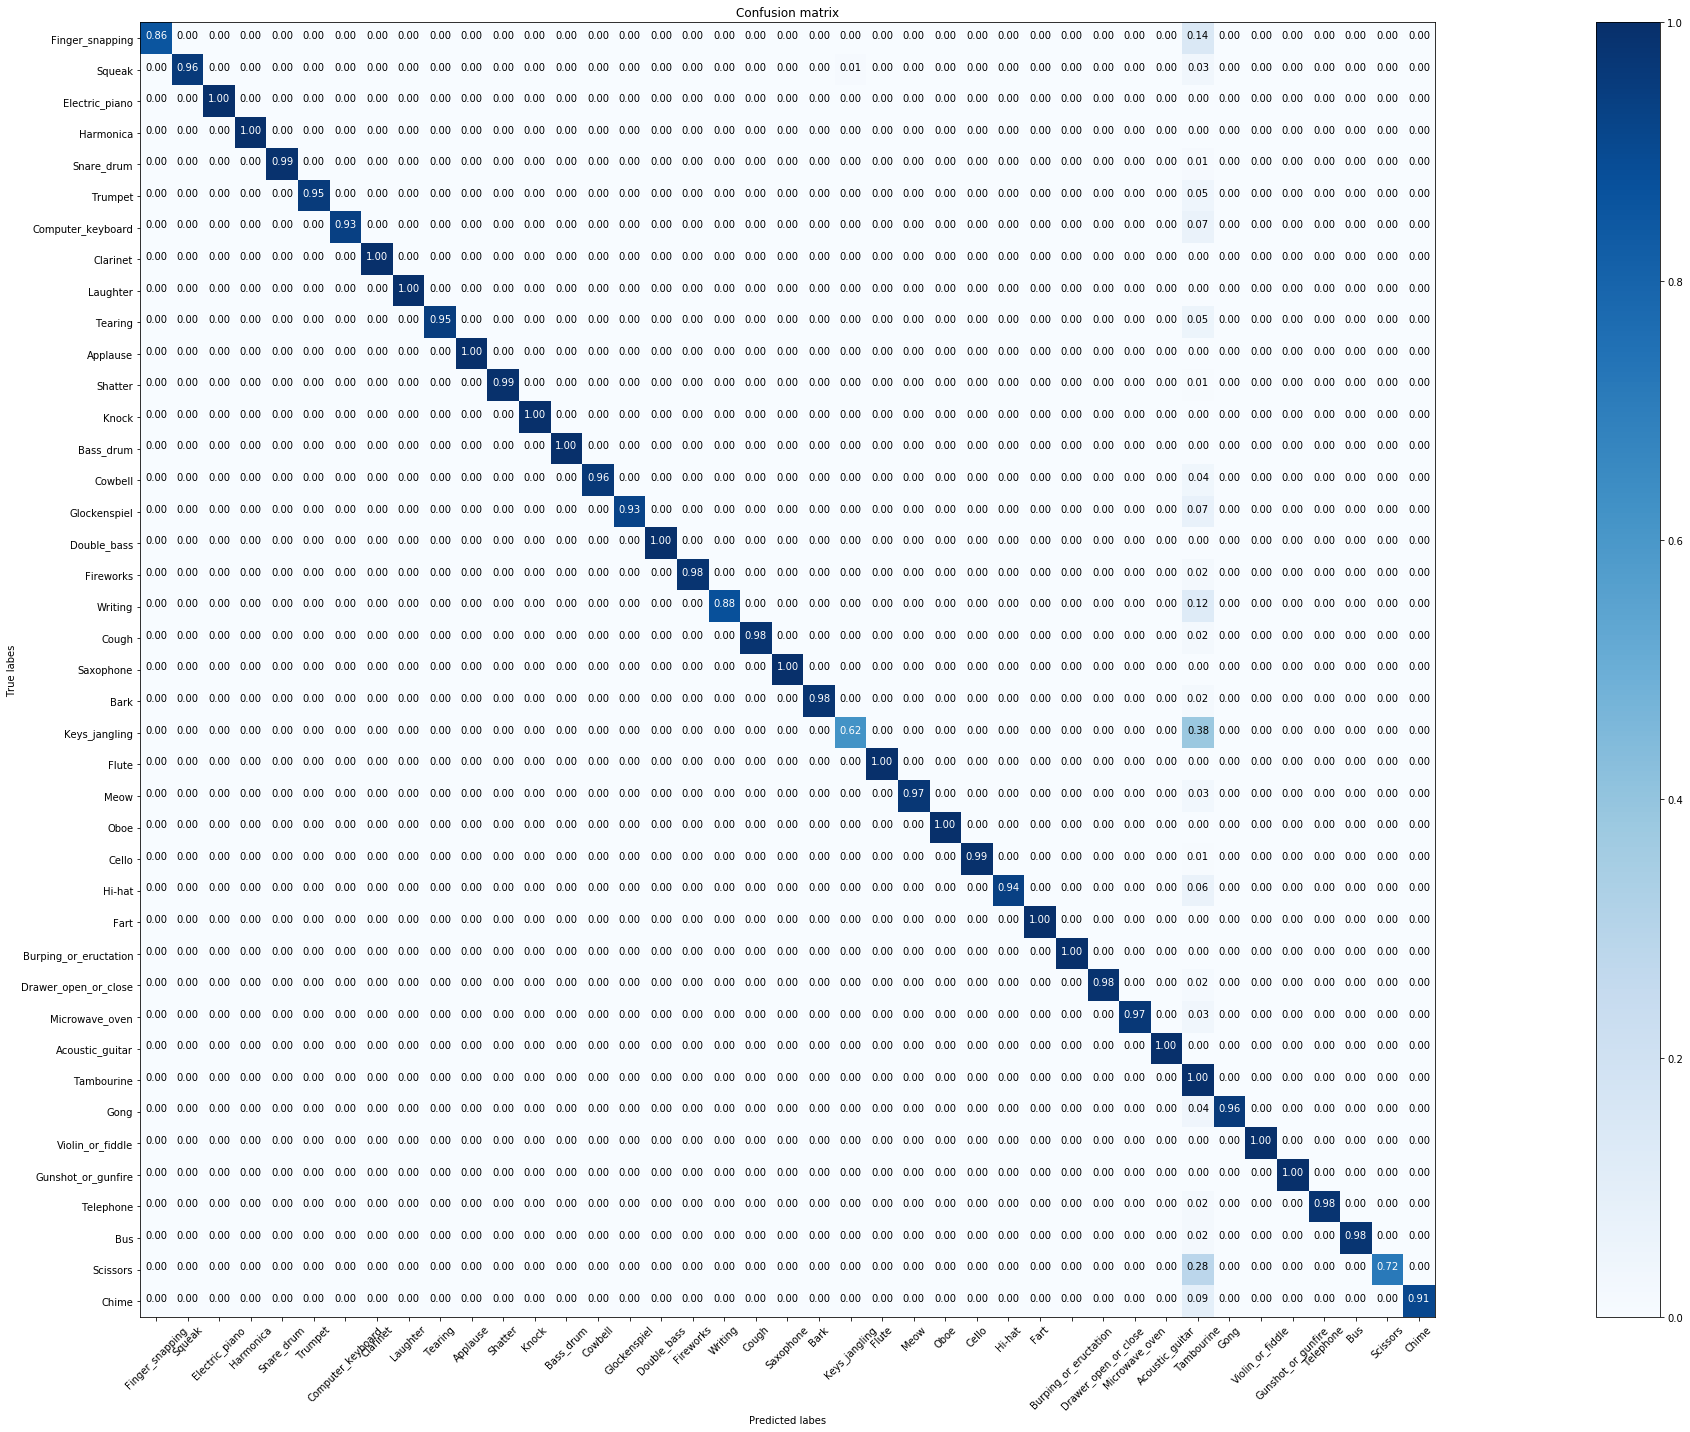

In [0]:
cm = confusion_matrix(label_train, prediction_train)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels_list))
plt.xticks(tick_marks, labels_list, rotation=45)
plt.yticks(tick_marks, labels_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()

#### Вариант с нормализацией данных для v1 по среднему значению и среднему отклонению

In [0]:
from google.colab import drive
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score

import pickle
import numpy as np

drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 7757322
-rw------- 1 root root  622477851 Mar  4 14:12  all_data_mel.pickle
-rw------- 1 root root 1238421886 Feb 27 14:57  all_data.pickle
-rw------- 1 root root      11384 Feb 27 14:12  all_label.pickle
-rw------- 1 root root  187421525 Mar  4 14:12  data_test.pickle
-rw------- 1 root root  435055710 Mar  4 14:12  data_train.pickle
-rw------- 1 root root       3420 Mar  4 14:12  label_test.pickle
-rw------- 1 root root       7970 Mar  4 14:12  label_train.pickle
-rw------- 1 root root  818934758 Mar 10 18:13  norm_test_data.pickle
-rw------- 1 root root  818934758 Mar  5 07:26  norm_test_data_v3.pickle
-rw------- 1 root root 1910688484 Mar 10 18:14  norm_train_data.pickle
-rw------- 1 root root 1910688484 Mar  5 07:27  norm_train_data_v3.pickle
-rw------- 1 root root      13768 Mar 10 20:50  prediction_test_v1.npy
-rw------- 1 root root      13768 M

In [0]:
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

with open(path + 'norm_train_data.pickle', 'rb') as f:
  train_data = pickle.load(f)

with open(path + 'norm_test_data.pickle', 'rb') as f:
  test_data = pickle.load(f)

with open(path + 'label_train.pickle', 'rb') as f:
  label_train = pickle.load(f)

with open(path + 'label_test.pickle', 'rb') as f:
  label_test = pickle.load(f)

In [0]:
# нормализация для train
mean = np.mean(train_data, axis=0)
train_data = train_data - mean
std = np.std(train_data, axis=0)
train_data /= std

In [0]:
# нормализация для test
test_data = test_data - mean
test_data /= std

In [0]:
# так как при всем количестве наблюдений и при 300  GridSearchCV(SVC()) не справляется, 
# зависает почти в самом конце, решила попробовать на 100 наблюдениях
# задаем изменяемые параметры param_grid
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['linear','rbf', 'poly']} 

grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=10)

grid.fit(test_data[:100], label_test[:100])

grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.600, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.500, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.650, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.600, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.550, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.5s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.4s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.500, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.550, total=   0.8s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.550, total=   1.0s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.500, total=   0.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.550, total=   0.9s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.600, total=   1.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  8.9min finished


{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}

In [0]:
svm = SVC(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm.fit(train_data, label_train)
prediction_test = svm.predict(test_data)
prediction_train = svm.predict(train_data)
# f1 = f1_score(label_test, prediction, average= 'micro')

In [0]:
print(classification_report(label_test, prediction_test, digits = 4))

              precision    recall  f1-score   support

           0     0.3333    0.2500    0.2857        24
           1     0.1875    0.0588    0.0896        51
           2     0.1111    0.2500    0.1538        24
           3     0.1064    0.1923    0.1370        26
           4     0.4200    0.4038    0.4118        52
           5     0.1304    0.0536    0.0759        56
           6     0.0000    0.0000    0.0000        20
           7     0.1765    0.3396    0.2323        53
           8     0.0833    0.0192    0.0312        52
           9     0.1591    0.1429    0.1505        49
          10     0.1810    0.7636    0.2927        55
          11     0.4583    0.2000    0.2785        55
          12     0.2581    0.1739    0.2078        46
          13     0.6538    0.6296    0.6415        54
          14     0.9444    0.4857    0.6415        35
          15     0.3077    0.2353    0.2667        17
          16     0.4857    0.2982    0.3696        57
          17     0.1667    

In [0]:
print(classification_report(label_train, prediction_train, digits = 4))

              precision    recall  f1-score   support

           0     0.9535    0.7321    0.8283        56
           1     1.0000    0.8333    0.9091       120
           2     1.0000    1.0000    1.0000        57
           3     1.0000    0.9661    0.9828        59
           4     1.0000    0.9504    0.9746       121
           5     0.9909    0.8258    0.9008       132
           6     0.9688    0.6739    0.7949        46
           7     1.0000    0.9919    0.9959       123
           8     1.0000    0.9508    0.9748       122
           9     0.9247    0.7611    0.8350       113
          10     1.0000    0.9844    0.9921       128
          11     1.0000    0.8605    0.9250       129
          12     0.9890    0.8411    0.9091       107
          13     1.0000    0.9764    0.9880       127
          14     0.9851    0.8049    0.8859        82
          15     1.0000    0.8250    0.9041        40
          16     0.9504    0.8582    0.9020       134
          17     1.0000    

In [0]:
# сохраняем предсказания для test и train v1 для дальнейшей работы

np.save(path + 'prediction_test_v1_norm', prediction_test)
np.save(path + 'prediction_train_v1_norm', prediction_train)

##### Матрица путаницы для test

In [0]:
import pandas as pd
import numpy as np
import pickle
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:
# подгружаем файл train.csv - для извлечения имен классов
data = pd.read_csv(path + 'train.csv')
labels = list(data['label'])

# создаем список для записи уникальных имен
labels_list = []
for i in labels:
    if i not in labels_list:
        labels_list.append(i)

In [0]:
# подгружаем сохраненные ранее верные label_test
# with open(path + 'label_train.pickle', 'rb') as f:
#   label_train = pickle.load(f)

with open(path + 'label_test.pickle', 'rb') as f:
  label_test = pickle.load(f)

In [0]:
# подгружаем сохраненные ранее предсказания для test и train
prediction_test = np.load(path + 'prediction_test_v1_norm.npy')
# prediction_train = np.load(path + 'prediction_train_v1.npy')

[[0.25       0.08333333 0.         ... 0.         0.         0.        ]
 [0.01960784 0.05882353 0.         ... 0.03921569 0.         0.        ]
 [0.         0.         0.25       ... 0.04166667 0.         0.04166667]
 ...
 [0.         0.         0.05263158 ... 0.15789474 0.         0.        ]
 [0.         0.05882353 0.         ... 0.05882353 0.         0.        ]
 [0.         0.         0.04347826 ... 0.         0.         0.08695652]]


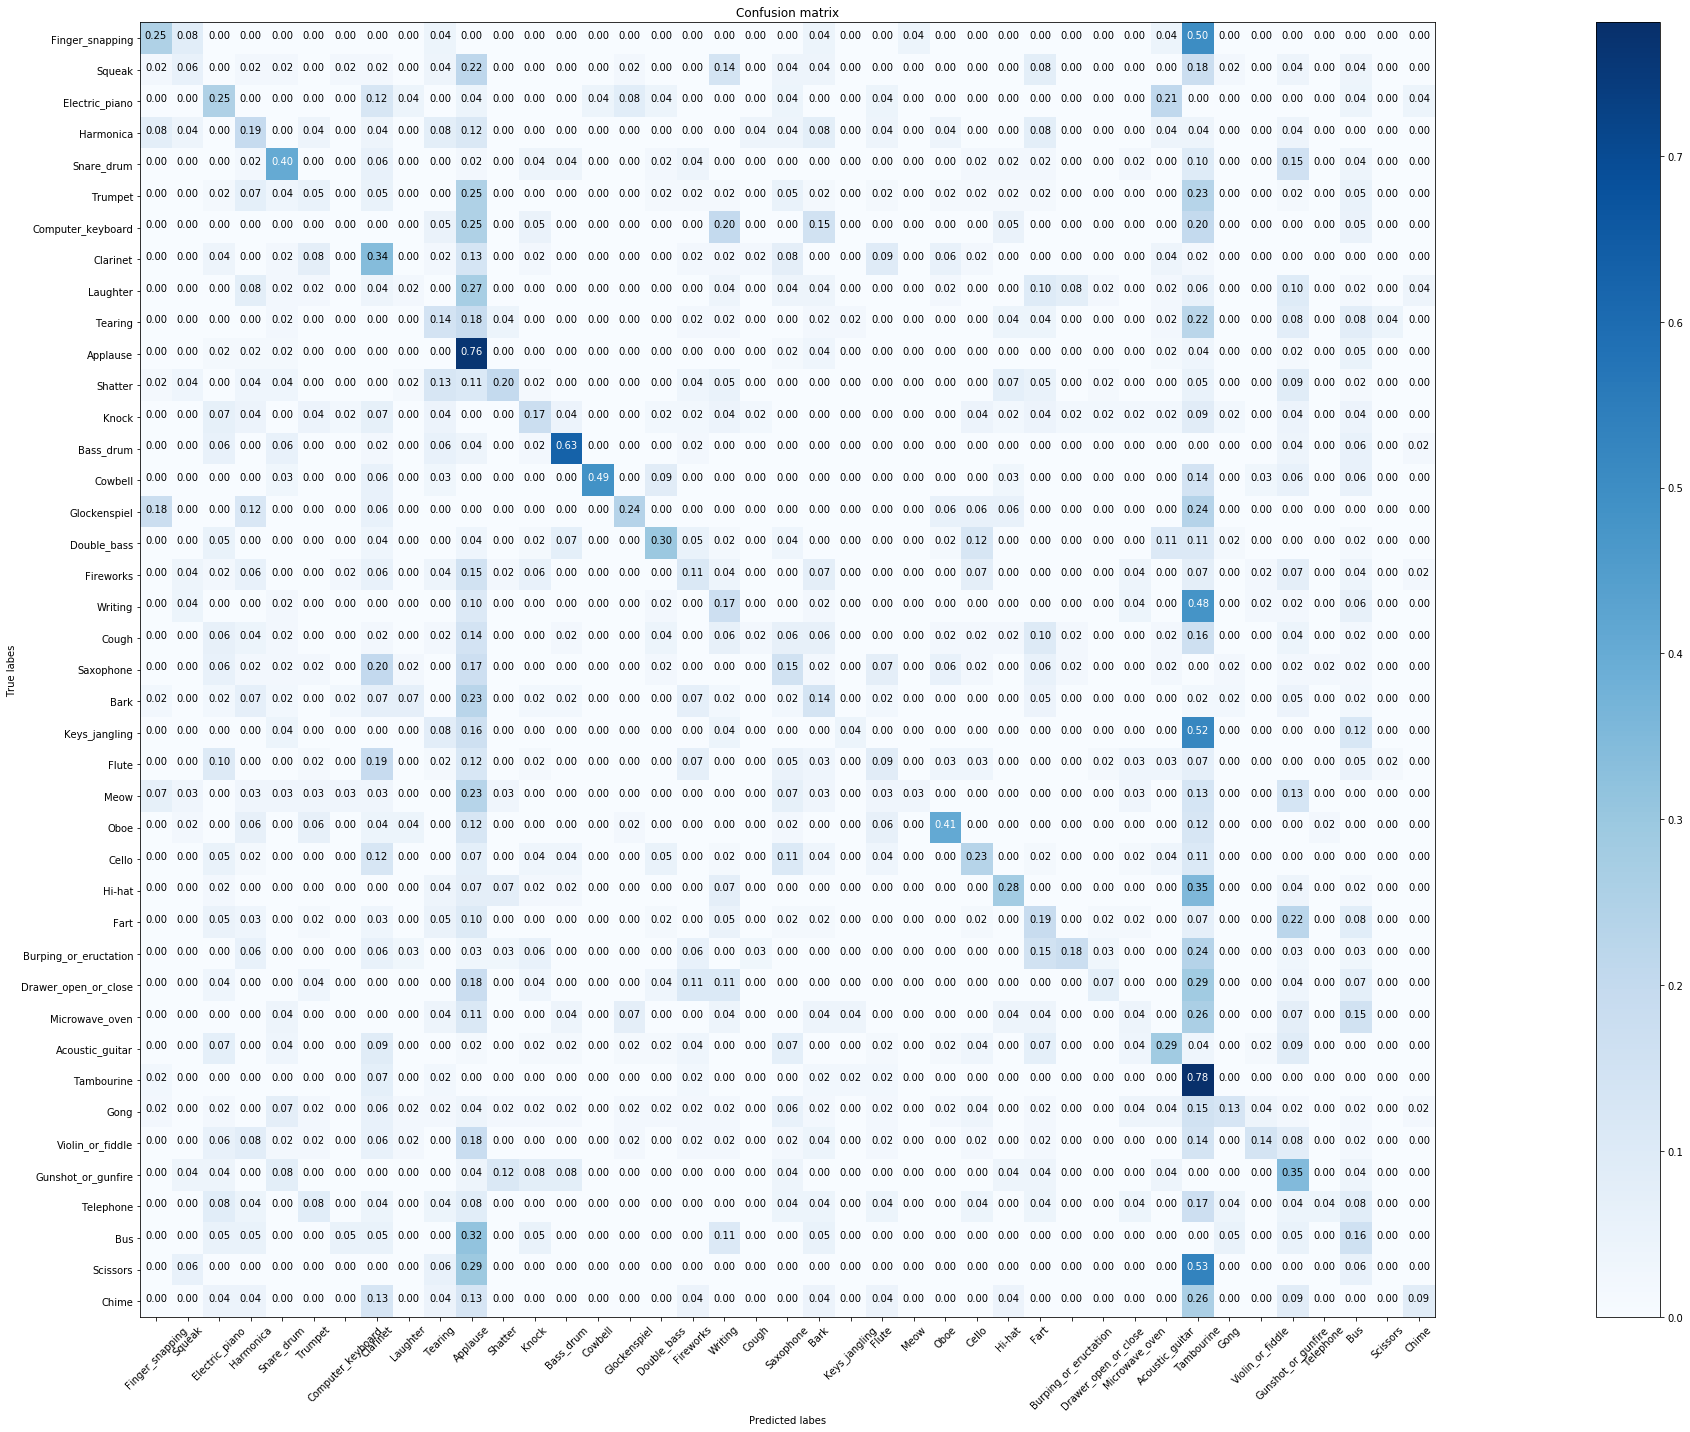

In [0]:
cm = confusion_matrix(label_test, prediction_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels_list))
plt.xticks(tick_marks, labels_list, rotation=45)
plt.yticks(tick_marks, labels_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()

Как можно заметить по матрице путаницы и по f_scora_weighted_avg, применение нормализации по среднему значению и среднему отклонению не повышает производительность классификатора.